In [5]:
import glob 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

csv_files = glob.glob("../output/parser/**/*.csv")

dfs = []
def strip_string(x):
    if isinstance(x, str):
        return x.strip()
    return x

for csv in csv_files:
    df = pd.read_csv(csv)
    
    
    
    df.replace({"True": 1, "False": 0, "TRUE": 1, "FALSE": 0, "true": 1, "false": 0}, inplace=True)
    
    # Extract 'language' and 'projeto' from 'file' column
    df['language'], df['projeto'] = zip(*df['file'].apply(lambda x: (x.split('/')[x.split('/').index('projects') + 1], x.split('/')[x.split('/').index('projects') + 2]) if 'projects' in x else (None, None)))
    
    
    dfs.append(df)


In [8]:
for df in dfs:
    # Check if any cell contains "True" or "False", ignoring case and spaces
    contains_true_false = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x).isin(["true", "false"]).any().any()

    print(contains_true_false)

In [11]:
# Lista de nomes de colunas
column_names = ["projeto", "language",'file','function','func_body','n_try_catch_ts', 'n_finally_ts',
        'n_generic_catch_ts',
       'n_useless_catch_ts', 'n_count_empty_catch_ts',
       'n_count_catch_reassigning_identifier_ts', 'n_wrapped_catch_ts', 'n_throw_ts', 'n_generic_throw_ts',
       'n_non_generic_throw_ts', 'n_not_recommended_throw_ts',
       'n_captures_try_catch_throw_ts', 'n_try_return_ts', 'n_nested_try_ts' , 'n_try_catch_java',
       'n_finally_java',
       'n_generic_catch_java', 'n_useless_catch_java', 'n_wrapped_catch_java',
       'n_count_empty_catch_java', 'n_count_catch_reassigning_identifier_java',
       'str_throw_identifiers_java', 'n_throw_java', 'n_generic_throw_java',
       'n_non_generic_throw_java', 'n_captures_try_catch_throw_java',
       'n_try_return_java', 'n_nested_try_java', 'throw_within_finally_java',
       'throwing_null_pointer_exception_java',
       'generic_exception_handling_java', 'instanceof_in_catch_java',
       'n_instanceof_in_catch_java', 'destructive_wrapping_java',
       'cause_in_catch_java', 'n_cout_get_cause_in_catch_java', 
       'n_try_except', 'n_try_pass', 'n_finally', 'n_generic_except',
       'n_raise', 'n_captures_broad_raise', 'n_captures_try_except_raise',
       'n_captures_misplaced_bare_raise', 'n_try_else', 'n_try_return',
       'n_nested_try', 'n_bare_except', 'n_bare_raise_finally']


col_smells_py = ["n_try_pass", "n_generic_except", "n_captures_broad_raise", "n_captures_misplaced_bare_raise", 
                 "n_try_return", "n_nested_try",  "n_bare_except", "n_bare_raise_finally"]

col_smells_ts = ["n_generic_catch_ts", "n_generic_throw_ts", "n_wrapped_catch_ts", "n_useless_catch_ts", "n_count_empty_catch_ts",
                 "n_count_catch_reassigning_identifier_ts", "n_not_recommended_throw_ts", "n_nested_try_ts"]

col_smells_java = ['n_generic_catch_java', 'n_generic_throw_java',  'throw_within_finally_java',  'throwing_null_pointer_exception_java',  'generic_exception_handling_java', 
                   'instanceof_in_catch_java', 'n_nested_try_java',  'cause_in_catch_java',  'destructive_wrapping_java',  'n_wrapped_catch_java',  'n_count_empty_catch_java']

# Mapeamento de linguagens
language_mapping = {"py": "Python", "java": "Java", "ts": "TypeScript", "tsx": "TypeScript"}

In [13]:
# Concatenate all dataframes in dfs
df_concat = pd.concat(dfs, ignore_index=True)

# Keep only the columns specified in column_names
df_concat = df_concat[column_names]

# Map the 'language' column to the full language names
df_concat['language'] = df_concat['language'].map(language_mapping)

ValueError: No objects to concatenate

In [14]:
df_concat.to_csv('new_dataframe.csv', index=False)

NameError: name 'df_concat' is not defined

In [ ]:
print(df_concat.iloc[:, -1])

: 

#### Results

In [2]:
# Lista de nomes de colunas
column_names = ["projeto", "language",'file','function','func_body','n_try_catch_ts', 'n_finally_ts',
        'n_generic_catch_ts',
       'n_useless_catch_ts', 'n_count_empty_catch_ts',
       'n_count_catch_reassigning_identifier_ts', 'n_wrapped_catch_ts', 'n_throw_ts', 'n_generic_throw_ts',
       'n_non_generic_throw_ts', 'n_not_recommended_throw_ts',
       'n_captures_try_catch_throw_ts', 'n_try_return_ts', 'n_nested_try_ts' , 'n_try_catch_java',
       'n_finally_java',
       'n_generic_catch_java', 'n_useless_catch_java', 'n_wrapped_catch_java',
       'n_count_empty_catch_java', 'n_count_catch_reassigning_identifier_java',
       'str_throw_identifiers_java', 'n_throw_java', 'n_generic_throw_java',
       'n_non_generic_throw_java', 'n_captures_try_catch_throw_java',
       'n_try_return_java', 'n_nested_try_java', 'throw_within_finally_java',
       'throwing_null_pointer_exception_java',
       'generic_exception_handling_java', 'instanceof_in_catch_java',
       'n_instanceof_in_catch_java', 'destructive_wrapping_java',
       'cause_in_catch_java', 'n_cout_get_cause_in_catch_java', 
       'n_try_except', 'n_try_pass', 'n_finally', 'n_generic_except',
       'n_raise', 'n_captures_broad_raise', 'n_captures_try_except_raise',
       'n_captures_misplaced_bare_raise', 'n_try_else', 'n_try_return',
       'n_nested_try', 'n_bare_except', 'n_bare_raise_finally']


col_smells_py = ["n_try_pass", "n_generic_except", "n_captures_broad_raise", "n_captures_try_except_raise", 
                 "n_captures_misplaced_bare_raise", "n_try_return", "n_nested_try",  "n_bare_except", "n_bare_raise_finally"]

col_smells_ts = ["n_generic_catch_ts", "n_generic_throw_ts", "n_wrapped_catch_ts", "n_useless_catch_ts", "n_count_empty_catch_ts",
                 "n_count_catch_reassigning_identifier_ts", "n_not_recommended_throw_ts", "n_nested_try_ts"]

col_smells_java = ['n_generic_catch_java', 'n_generic_throw_java',  'throw_within_finally_java',  'throwing_null_pointer_exception_java',  'generic_exception_handling_java', 
                   'instanceof_in_catch_java', 'n_nested_try_java',  'cause_in_catch_java',  'destructive_wrapping_java',  'n_wrapped_catch_java',  'n_count_empty_catch_java']

col_smells_all = col_smells_py + col_smells_ts + col_smells_java

In [3]:
col_smells_all

['n_try_pass',
 'n_generic_except',
 'n_captures_broad_raise',
 'n_captures_try_except_raise',
 'n_captures_misplaced_bare_raise',
 'n_try_return',
 'n_nested_try',
 'n_bare_except',
 'n_bare_raise_finally',
 'n_generic_catch_ts',
 'n_generic_throw_ts',
 'n_wrapped_catch_ts',
 'n_useless_catch_ts',
 'n_count_empty_catch_ts',
 'n_count_catch_reassigning_identifier_ts',
 'n_not_recommended_throw_ts',
 'n_nested_try_ts',
 'n_generic_catch_java',
 'n_generic_throw_java',
 'throw_within_finally_java',
 'throwing_null_pointer_exception_java',
 'generic_exception_handling_java',
 'instanceof_in_catch_java',
 'n_nested_try_java',
 'cause_in_catch_java',
 'destructive_wrapping_java',
 'n_wrapped_catch_java',
 'n_count_empty_catch_java']

In [6]:
df = pd.read_csv("new_dataframe.csv")

/home/r4ph/desenv/SBES-exception-miner/env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3550: DtypeWarning: Columns (33,34,35,36,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
df.loc[:, col_smells_all].sum()

n_try_pass                                   91.0
n_generic_except                            298.0
n_captures_broad_raise                      201.0
n_captures_try_except_raise                  60.0
n_captures_misplaced_bare_raise               0.0
n_try_return                                267.0
n_nested_try                                  5.0
n_bare_except                                 2.0
n_bare_raise_finally                          0.0
n_generic_catch_ts                           20.0
n_generic_throw_ts                          306.0
n_wrapped_catch_ts                          151.0
n_useless_catch_ts                            8.0
n_count_empty_catch_ts                      512.0
n_count_catch_reassigning_identifier_ts       0.0
n_not_recommended_throw_ts                  152.0
n_nested_try_ts                               2.0
n_generic_catch_java                        400.0
n_generic_throw_java                          4.0
throw_within_finally_java                       3


In [8]:
def count_values_greater_equal_one(df, cols):

    result_list = []
    
    for i, row in df.iterrows():
        # Iterate over each specified column in the row
        result = []
        for col in cols: 
            if row[col] >= 1:
                result.append(row[col])
            else:
                result.append(0)

        result_list.append(sum(result))

    return result_list


In [9]:
df['smells_py'] = count_values_greater_equal_one(df, col_smells_py)
df['smells_ts'] = count_values_greater_equal_one(df, col_smells_ts)
df['smells_java'] = count_values_greater_equal_one(df, col_smells_java)

In [10]:
df.loc[:,:].groupby('projeto').sum()

,n_try_catch_ts,n_finally_ts,n_generic_catch_ts,n_useless_catch_ts,n_count_empty_catch_ts,n_count_catch_reassigning_identifier_ts,n_wrapped_catch_ts,n_throw_ts,n_generic_throw_ts,n_non_generic_throw_ts,...,n_captures_try_except_raise,n_captures_misplaced_bare_raise,n_try_else,n_try_return,n_nested_try,n_bare_except,n_bare_raise_finally,smells_py,smells_ts,smells_java
projeto,,,,,,,,,,,,,,,,,,,,,
Arduino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,10.0,0.0,0.0,0.0,24.0,0.0,1133.0
airbyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.0,0.0,23.0,224.0,1.0,2.0,0.0,760.0,0.0,1658.0
apitable,107.0,2.0,6.0,1.0,107.0,0.0,40.0,81.0,47.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,221.0,626.0
ar-cutpaste,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
capacitor,66.0,0.0,1.0,2.0,66.0,0.0,18.0,56.0,7.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.0,419.0
flipper,151.0,14.0,7.0,1.0,151.0,0.0,37.0,161.0,123.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,348.0,253.0
github,104.0,31.0,2.0,0.0,104.0,0.0,21.0,136.0,75.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230.0,605.0
jupyterlab,75.0,3.0,2.0,4.0,75.0,0.0,34.0,102.0,51.0,31.0,...,2.0,0.0,6.0,6.0,0.0,0.0,0.0,48.0,202.0,0.0
kubeflow,6.0,0.0,0.0,0.0,6.0,0.0,1.0,2.0,2.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,9.0,9.0,0.0


In [40]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        #print('Working on column: {}'.format(col))
        mean = df[col].mean()
        sd = df[col].std()
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [41]:
df_dist = df.melt(id_vars=['projeto'], value_vars=['smells_py', 'smells_ts', 'smells_java'], 
                         var_name='smells_type', value_name='values')

types = df_dist['smells_type'].unique()
df_dist_adj = pd.DataFrame()
for typee in types:
    _df = remove_outliers(df_dist[df_dist['smells_type'] == typee], ['values'], 10)
    df_dist_adj = pd.concat([_df, df_dist_adj], ignore_index=True)

df_dist_adj[df_dist_adj['values']!=0]

,projeto,smells_type,values
9805,capacitor,smells_java,3.0
9806,capacitor,smells_java,3.0
9807,capacitor,smells_java,3.0
9808,capacitor,smells_java,3.0
9809,capacitor,smells_java,3.0
...,...,...,...
158939,kubeflow,smells_py,1.0
158941,kubeflow,smells_py,1.0
158959,kubeflow,smells_py,1.0
158979,kubeflow,smells_py,1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


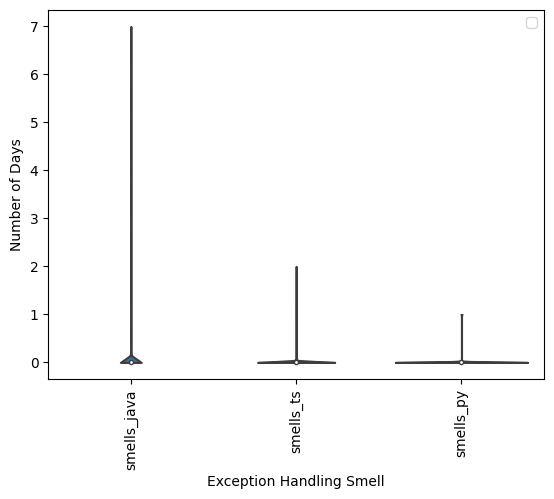

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.violinplot(x='smells_type', y='values', orient= 'v', cut=0, data=df_dist_adj).get_figure()
plt.ylabel("Number of Days", fontsize= 10)
plt.xlabel("Exception Handling Smell", fontsize= 10)
plt.tick_params(axis='x', rotation=90)
plt.legend(loc="best", ncol=3)
plt.title("", fontsize= 15)

plt.show()

In [ ]:
df.groupby(['projeto']).sum()[['smells_py', 'smells_ts', 'smells_java']].reset_index().to_csv("results_all.csv", index=False)

In [ ]:
df.loc[:,['projeto'] + col_smells_py].groupby(['projeto']).sum()

,n_try_pass,n_generic_except,n_captures_broad_raise,n_captures_try_except_raise,n_captures_misplaced_bare_raise,n_try_return,n_nested_try,n_bare_except,n_bare_raise_finally
projeto,,,,,,,,,
Arduino,8.0,1.0,5.0,0.0,0.0,10.0,0.0,0.0,0.0
airbyte,56.0,241.0,178.0,58.0,0.0,224.0,1.0,2.0,0.0
apitable,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ar-cutpaste,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
capacitor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
flipper,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
github,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jupyterlab,8.0,32.0,0.0,2.0,0.0,6.0,0.0,0.0,0.0
kubeflow,1.0,2.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0


In [ ]:
df.loc[:,['projeto'] + col_smells_py].groupby(['projeto']).sum().to_csv("results_py.csv")

In [ ]:
df.loc[:,['projeto'] + col_smells_ts].groupby(['projeto']).sum()

,n_generic_catch_ts,n_generic_throw_ts,n_wrapped_catch_ts,n_useless_catch_ts,n_count_empty_catch_ts,n_count_catch_reassigning_identifier_ts,n_not_recommended_throw_ts,n_nested_try_ts
projeto,,,,,,,,
Arduino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
airbyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
apitable,6.0,47.0,40.0,1.0,107.0,0.0,20.0,0.0
ar-cutpaste,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
capacitor,1.0,7.0,18.0,2.0,66.0,0.0,40.0,1.0
flipper,7.0,123.0,37.0,1.0,151.0,0.0,29.0,0.0
github,2.0,75.0,21.0,0.0,104.0,0.0,27.0,1.0
jupyterlab,2.0,51.0,34.0,4.0,75.0,0.0,36.0,0.0
kubeflow,0.0,2.0,1.0,0.0,6.0,0.0,0.0,0.0


In [ ]:
df.loc[:,['projeto'] + col_smells_ts].groupby(['projeto']).sum().to_csv("results_ts.csv")

In [ ]:
df.loc[:,['projeto'] + col_smells_java].groupby(['projeto']).sum().reset_index()

,projeto,n_generic_catch_java,n_generic_throw_java,n_nested_try_java,n_wrapped_catch_java,n_count_empty_catch_java
0,Arduino,126.0,1.0,2.0,291.0,572.0
1,airbyte,148.0,0.0,0.0,405.0,782.0
2,apitable,56.0,3.0,2.0,160.0,302.0
3,ar-cutpaste,0.0,0.0,0.0,0.0,0.0
4,capacitor,39.0,0.0,0.0,115.0,220.0
5,flipper,20.0,0.0,3.0,72.0,128.0
6,github,1.0,0.0,0.0,96.0,192.0
7,jupyterlab,0.0,0.0,0.0,0.0,0.0
8,kubeflow,0.0,0.0,0.0,0.0,0.0
9,leon,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.loc[:,['projeto'] + col_smells_java].groupby(['projeto']).sum().reset_index().to_csv("results_java.csv")